In [1]:
import keras
from keras.layers import Input, Dense, Flatten, Conv2D
from keras.models import Model
from keras.optimizers import Adam
import yaml
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0,'../lib')
from train import get_features
from evaluation import makeRoc, learningCurveLoss

Using TensorFlow backend.


In [2]:
from collections import namedtuple
Option = namedtuple("MyStruct", "inputModel inputFile tree config")
options = Option(
    inputModel = 'KERAS_conv2d_model_weights.h5',
    inputFile = '../processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z',
    tree = 't_allpar_new',
    config = 'train_config_conv2d.yml',
)

print("Loading configuration from", options.config)
config = open(options.config, 'r')
yamlConfig =  yaml.load(config, Loader = yaml.FullLoader)
yamlConfig

Loading configuration from train_config_conv2d.yml


{'Inputs': ['j1_etarot', 'j1_phirot', 'j1_ptrel', 'j_index'],
 'Labels': ['j_g', 'j_q', 'j_w', 'j_z', 'j_t', 'j_index'],
 'KerasModel': 'conv2d_model',
 'KerasModelRetrain': 'conv2d_model_constraint',
 'KerasLoss': 'categorical_crossentropy',
 'L1Reg': 0.0001,
 'NormalizeInputs': 0,
 'InputType': 'Conv2D',
 'BinsX': 40,
 'MinX': -0.8,
 'MaxX': 0.8,
 'BinsY': 40,
 'MinY': -1.0,
 'MaxY': 1.0,
 'MaxParticles': 100}

# Preprocessing & Train

In [3]:
X_train_val, X_test, y_train_val, y_test, labels = get_features(options, yamlConfig)

(5131613,)
('index', 'j_ptfrac', 'j_pt', 'j_eta', 'j_mass', 'j_tau1_b1', 'j_tau2_b1', 'j_tau3_b1', 'j_tau1_b2', 'j_tau2_b2', 'j_tau3_b2', 'j_tau32_b1', 'j_tau32_b2', 'j_zlogz', 'j_c1_b0', 'j_c1_b1', 'j_c1_b2', 'j_c2_b1', 'j_c2_b2', 'j_d2_b1', 'j_d2_b2', 'j_d2_a1_b1', 'j_d2_a1_b2', 'j_m2_b1', 'j_m2_b2', 'j_n2_b1', 'j_n2_b2', 'j_tau1_b1_mmdt', 'j_tau2_b1_mmdt', 'j_tau3_b1_mmdt', 'j_tau1_b2_mmdt', 'j_tau2_b2_mmdt', 'j_tau3_b2_mmdt', 'j_tau32_b1_mmdt', 'j_tau32_b2_mmdt', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt', 'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 'j_d2_b1_mmdt', 'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 'j_n2_b2_mmdt', 'j_mass_trim', 'j_mass_mmdt', 'j_mass_prun', 'j_mass_sdb2', 'j_mass_sdm1', 'j_multiplicity', 'j1_px', 'j1_py', 'j1_pz', 'j1_e', 'j1_pdgid', 'j1_erel', 'j1_pt', 'j1_ptrel', 'j1_eta', 'j1_etarel', 'j1_etarot', 'j1_phi', 'j1_phirel', 'j1_phirot', 'j1_deltaR', 'j1_costheta', 'j1_costhetarel', 'j1_e1mcosthetarel', 'j_

## Heatmap

In [4]:
q_plt = np.zeros([40, 40])
g_plt = np.zeros([40, 40])
w_plt = np.zeros([40, 40])
z_plt = np.zeros([40, 40])
t_plt = np.zeros([40, 40])
for x in range(0, len(X_train_val) - 1):
    if y_train_val[x, :][0] == 1:
        g_plt += X_train_val[x, :, :, 0]
    elif y_train_val[x, :][1] == 1:
        q_plt += X_train_val[x, :, :, 0]
    elif y_train_val[x, :][2] == 1:
        w_plt += X_train_val[x, :, :, 0]
    elif y_train_val[x, :][3] == 1:
        z_plt += X_train_val[x, :, :, 0]
    elif y_train_val[x, :][4] == 1:
        t_plt += X_train_val[x, :, :, 0]

In [32]:
import matplotlib.colors as colors
def heatmap(input_array):
    plt.imshow(input_array, cmap='hot', norm=colors.LogNorm(vmin=0.01))
    plt.colorbar()
    plt.show()

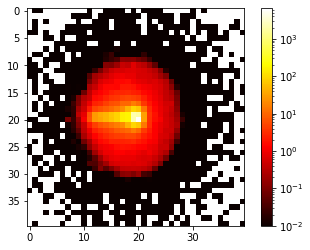

In [33]:
heatmap(q_plt)

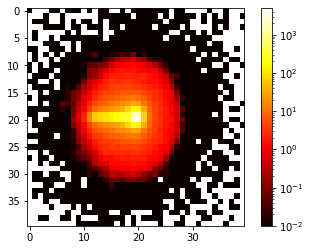

In [34]:
heatmap(g_plt)

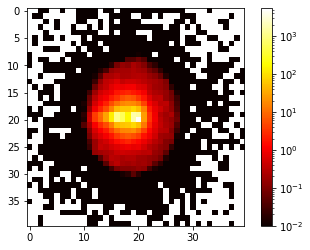

In [35]:
heatmap(w_plt)

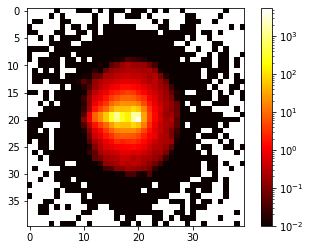

In [36]:
heatmap(z_plt)

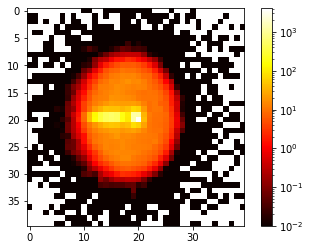

In [37]:
heatmap(t_plt)

In [11]:
q_plt_test = np.zeros([40, 40])
g_plt_test = np.zeros([40, 40])
w_plt_test = np.zeros([40, 40])
z_plt_test = np.zeros([40, 40])
t_plt_test = np.zeros([40, 40])
for x in range(0, len(X_test) - 1):
    if y_test[x, :][0] == 1:
        g_plt_test += X_test[x, :, :, 0]
    elif y_test[x, :][1] == 1:
        q_plt_test += X_test[x, :, :, 0]
    elif y_test[x, :][2] == 1:
        w_plt_test += X_test[x, :, :, 0]
    elif y_test[x, :][3] == 1:
        z_plt_test += X_test[x, :, :, 0]
    elif y_test[x, :][4] == 1:
        t_plt_test += X_test[x, :, :, 0]

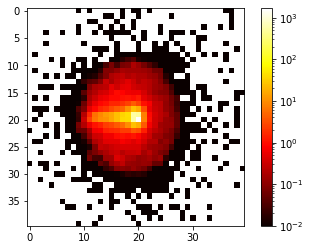

In [38]:
heatmap(q_plt_test)

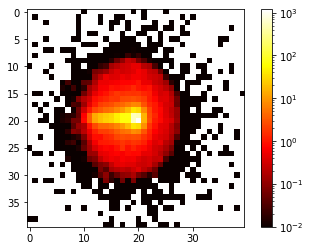

In [39]:
heatmap(g_plt_test)

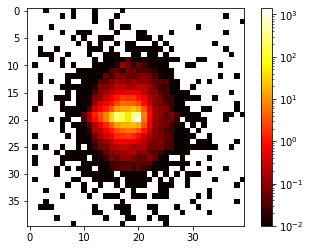

In [40]:
heatmap(w_plt_test)

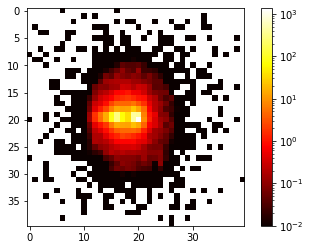

In [41]:
heatmap(z_plt_test)

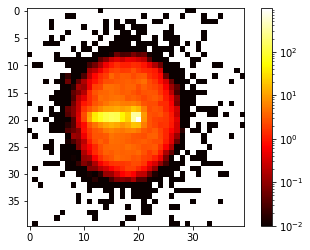

In [42]:
heatmap(t_plt_test)

# Model Construction

In [17]:
Inputs = Input(shape=(40, 40, 1,))
x = Conv2D(filters=8, kernel_size=(11,11), strides=(1,1), padding='same',
           kernel_initializer='he_normal', use_bias=True, name='conv1_relu',
           activation = 'relu')(Inputs)
x = Conv2D(filters=4, kernel_size=(3,3), strides=(2,2), padding='same',
           kernel_initializer='he_normal', use_bias=True, name='conv2_relu',
           activation = 'relu')(x)
x = Conv2D(filters=2, kernel_size=(3,3), strides=(2,2), padding='same',
           kernel_initializer='he_normal', use_bias=True, name='conv3_relu',
           activation = 'relu')(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(5, activation='softmax', kernel_initializer='lecun_uniform', name='output_softmax')(x)
model = Model(inputs=Inputs, outputs=predictions)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 40, 1)]       0         
_________________________________________________________________
conv1_relu (Conv2D)          (None, 40, 40, 8)         976       
_________________________________________________________________
conv2_relu (Conv2D)          (None, 20, 20, 4)         292       
_________________________________________________________________
conv3_relu (Conv2D)          (None, 10, 10, 2)         74        
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                6432      
_________________________________________________________________
output_softmax (Dense)       (None, 5)                 165   

In [18]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss=[yamlConfig['KerasLoss']], metrics=['accuracy'])

In [19]:
history = model.fit(X_train_val, y_train_val, batch_size = 1024, epochs = 100,
                    validation_split = 0.25, shuffle = True, callbacks = None, 
                    use_multiprocessing=True, workers=4)

Epoch 1/100
58/58 [==============================] - 1s 19ms/step - loss: 1.6083 - accuracy: 0.2086 - val_loss: 1.6072 - val_accuracy: 0.2067
Epoch 2/100
58/58 [==============================] - 1s 14ms/step - loss: 1.6057 - accuracy: 0.2459 - val_loss: 1.6033 - val_accuracy: 0.3023
Epoch 3/100
58/58 [==============================] - 1s 14ms/step - loss: 1.5993 - accuracy: 0.3279 - val_loss: 1.5939 - val_accuracy: 0.3449
Epoch 4/100
58/58 [==============================] - 1s 14ms/step - loss: 1.5866 - accuracy: 0.3778 - val_loss: 1.5771 - val_accuracy: 0.4058
Epoch 5/100
58/58 [==============================] - 1s 14ms/step - loss: 1.5651 - accuracy: 0.4134 - val_loss: 1.5503 - val_accuracy: 0.4104
Epoch 6/100
58/58 [==============================] - 1s 14ms/step - loss: 1.5336 - accuracy: 0.4151 - val_loss: 1.5136 - val_accuracy: 0.4351
Epoch 7/100
58/58 [==============================] - 1s 14ms/step - loss: 1.4932 - accuracy: 0.4295 - val_loss: 1.4691 - val_accuracy: 0.4429
Epoch 

# Evaluate

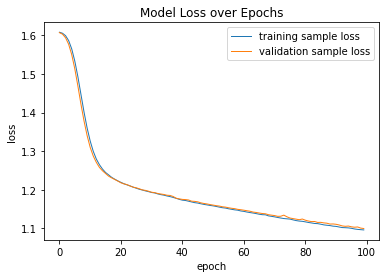

In [20]:
learningCurveLoss(history)

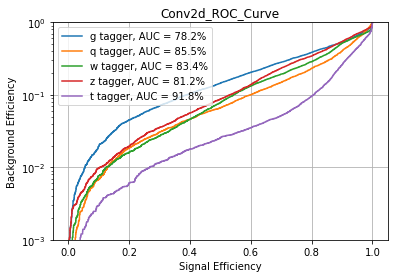

In [21]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='Conv2d')